# TorontoWeatherProjection

---

## Review Toronto Weather Historically

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
# from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# to display html file in kernel
from IPython.display import HTML

### About historic weather data we found

In [2]:

# data we found:
# starting from 2013 to 2023, 12 csv file for each month and hourly granulation
# all total of 120 csv file.
# here is 1 month of data, 2013 January

# csv to dataframe
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2013/en_climate_hourly_ON_6158355_01-2013_P1H.csv")
display(monthlyTemp)






,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,-79.4,43.67,TORONTO CITY,6158355,2013-01-01 00:00,2013,1,1,00:00,-0.3,...,M,NaN,NaN,99.93,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.67,TORONTO CITY,6158355,2013-01-01 01:00,2013,1,1,01:00,-1.1,...,M,NaN,NaN,99.90,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.67,TORONTO CITY,6158355,2013-01-01 02:00,2013,1,1,02:00,-1.6,...,M,NaN,NaN,99.98,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.67,TORONTO CITY,6158355,2013-01-01 03:00,2013,1,1,03:00,-1.7,...,M,NaN,NaN,100.06,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.67,TORONTO CITY,6158355,2013-01-01 04:00,2013,1,1,04:00,-2.1,...,M,NaN,NaN,100.05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,-79.4,43.67,TORONTO CITY,6158355,2013-01-31 19:00,2013,1,31,19:00,-4.4,...,M,NaN,NaN,99.04,NaN,NaN,NaN,NaN,NaN,NaN
740,-79.4,43.67,TORONTO CITY,6158355,2013-01-31 20:00,2013,1,31,20:00,-4.7,...,M,NaN,NaN,99.09,NaN,NaN,NaN,NaN,NaN,NaN
741,-79.4,43.67,TORONTO CITY,6158355,2013-01-31 21:00,2013,1,31,21:00,-4.6,...,M,NaN,NaN,99.12,NaN,NaN,NaN,NaN,NaN,NaN
742,-79.4,43.67,TORONTO CITY,6158355,2013-01-31 22:00,2013,1,31,22:00,-5.0,...,M,NaN,NaN,99.19,NaN,NaN,NaN,NaN,NaN,NaN


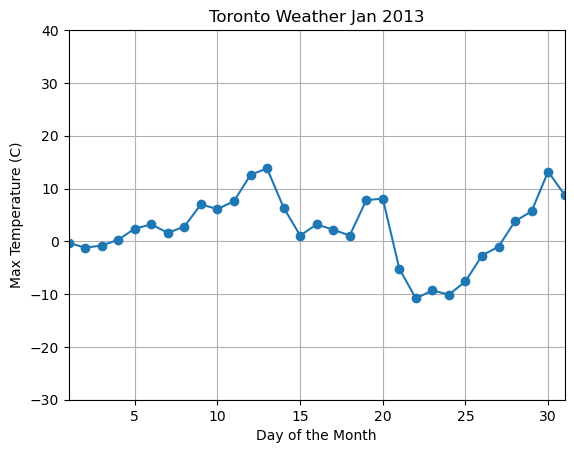

In [3]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2013/en_climate_hourly_ON_6158355_01-2013_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

daily = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = daily["Day"]
y_values = daily["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather Jan 2013")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

### Review Hottest Summer Motnts

### July 2013 

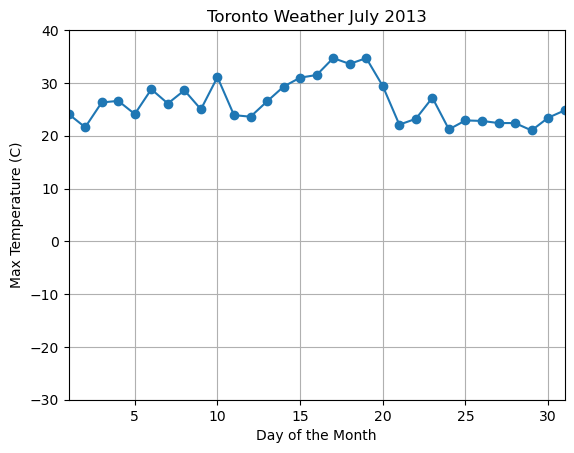

Max Temp in July 2013: 34.7


In [4]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2013/en_climate_hourly_ON_6158355_07-2013_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july13 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july13["Day"]
y_values = july13["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2013")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

July2013Max = july13["Temp"].max()
print(f"Max Temp in July 2013: {July2013Max}")

### July 2014 

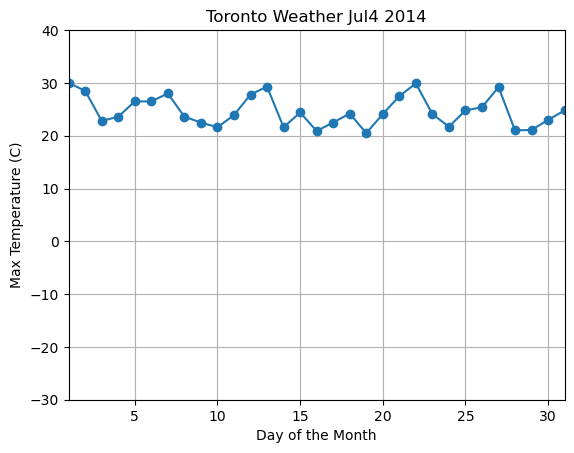

Max Temp in July 2014: 30.0


In [5]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2014/en_climate_hourly_ON_6158355_07-2014_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july14 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july14["Day"]
y_values = july14["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather Jul4 2014")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

July2014Max = july14["Temp"].max()
print(f"Max Temp in July 2014: {July2014Max}")

###  July 2015

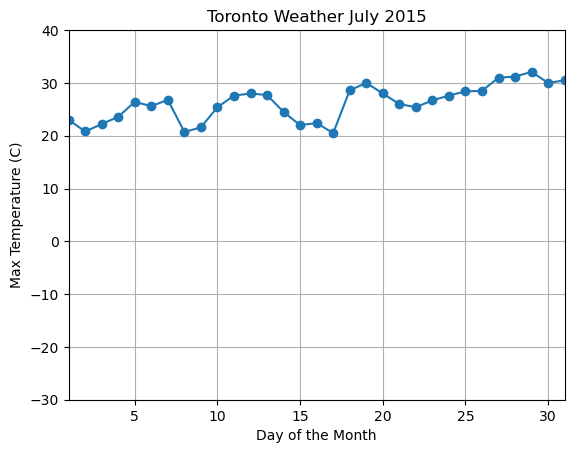

Max Temp in July 2015: 32.1


In [6]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2015/en_climate_hourly_ON_6158355_07-2015_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july15 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july15["Day"]
y_values = july15["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2015")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

July2015Max = july15["Temp"].max()
print(f"Max Temp in July 2015: {July2015Max}")

###  July 2016

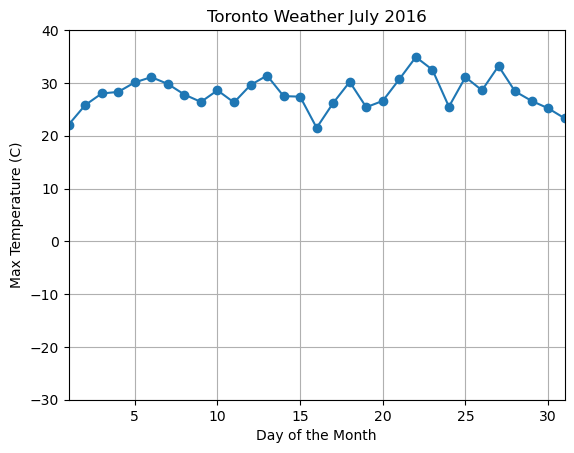

Max Temp in July 2016: 34.9


In [7]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2016/en_climate_hourly_ON_6158355_07-2016_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july16 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july16["Day"]
y_values = july16["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2016")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

July2016Max = july16["Temp"].max()
print(f"Max Temp in July 2016: {July2016Max}")

###  July 2017

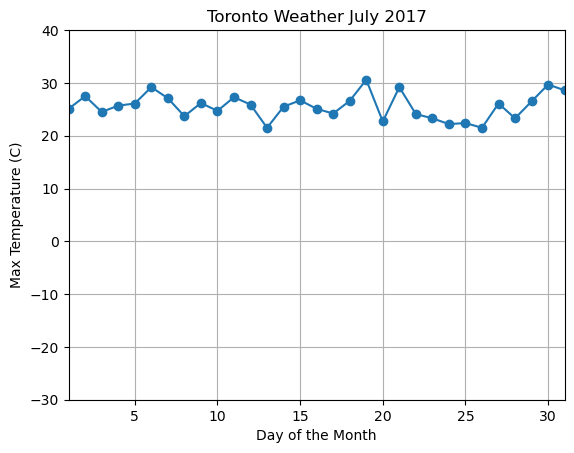

Max Temp in July 2017: 30.6


In [8]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2017/en_climate_hourly_ON_6158355_07-2017_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july17 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july17["Day"]
y_values = july17["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2017")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

July2017Max = july17["Temp"].max()
print(f"Max Temp in July 2017: {July2017Max}")

###  July 2018

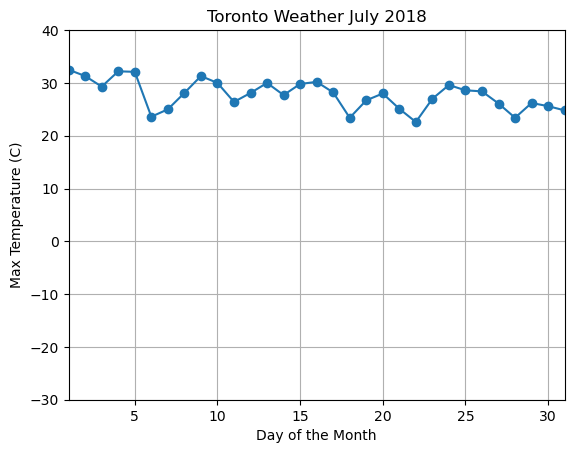

Max Temp in July 2018: 32.5


In [9]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2018/en_climate_hourly_ON_6158355_07-2018_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july18 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july18["Day"]
y_values = july18["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2018")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

July2018Max = july18["Temp"].max()
print(f"Max Temp in July 2018: {July2018Max}")

###  July 2019

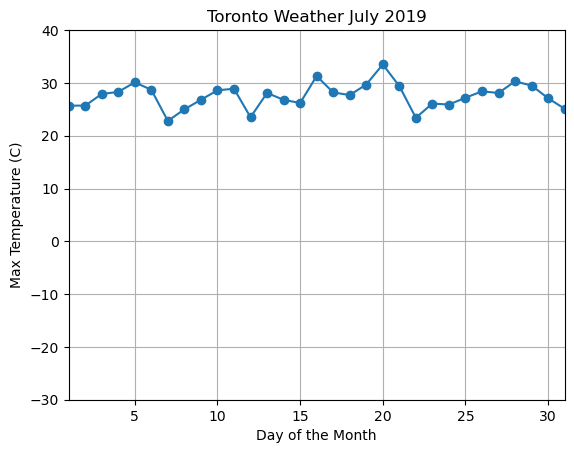

Max Temp in July 2019: 33.5


In [10]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2019/en_climate_hourly_ON_6158355_07-2019_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july19 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july19["Day"]
y_values = july19["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2019")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

July2019Max = july19["Temp"].max()
print(f"Max Temp in July 2019: {July2019Max}")

###  July 2020

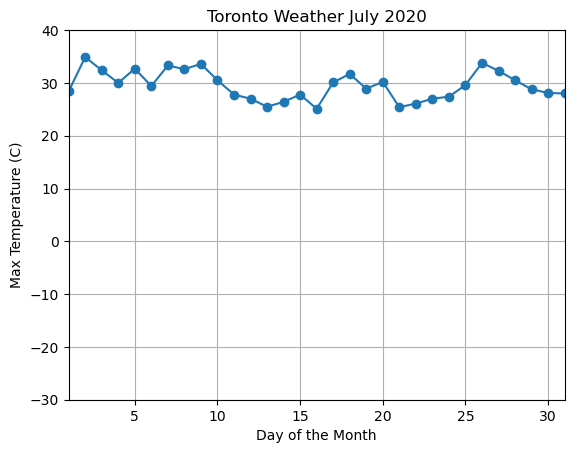

Max Temp in July 2020: 34.9


In [11]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2020/en_climate_hourly_ON_6158355_07-2020_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].     groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].    groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].      groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july20 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july20["Day"]
y_values = july20["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2020")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

July2020Max = july20["Temp"].max()
print(f"Max Temp in July 2020: {July2020Max}")

###  July 2021

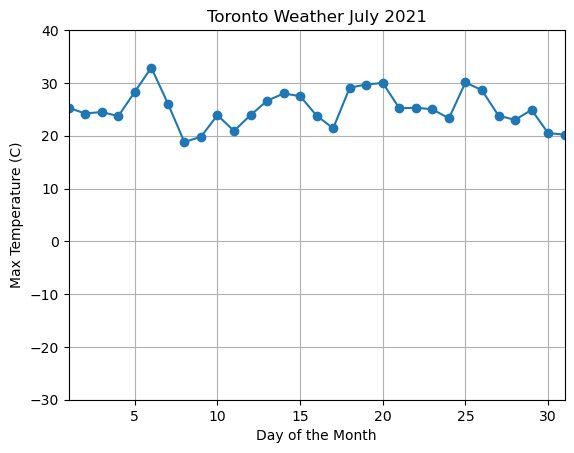

Max Temp in July 2021: 32.9


In [12]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2021/en_climate_hourly_ON_6158355_07-2021_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].     groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].    groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].      groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july21 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july21["Day"]
y_values = july21["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2021")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

July2021Max = july21["Temp"].max()
print(f"Max Temp in July 2021: {July2021Max}")

###  July 2022

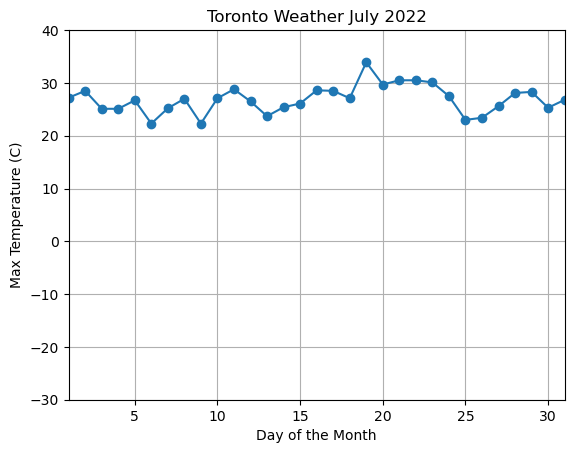

Max Temp in July 2022: 33.9


In [13]:
# original data have per hour granulation
monthlyTemp = pd.read_csv("weatherInput/2022/en_climate_hourly_ON_6158355_07-2022_P1H.csv")
# select day max temperature and create 1 row per day
year    = monthlyTemp['Year'].     groupby(monthlyTemp['Day']).mean()
month   = monthlyTemp['Month'].    groupby(monthlyTemp['Day']).mean()
day     = monthlyTemp['Day'].      groupby(monthlyTemp['Day']).mean()
maxTemp = monthlyTemp['Temp (°C)'].groupby(monthlyTemp['Day']).max()

july22 = pd.DataFrame({  "Year":  year, 
                        "Month": month, 
                        "Day":   day, 
                        "Temp":  maxTemp, 
                        })

# Extract relevant fields from the data frame
x_values = july22["Day"]
y_values = july22["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
plt.xlim(1, 31)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather July 2022")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Day of the Month")
plt.grid(True)

# Show plot
plt.show()

July2022Max = july22["Temp"].max()
print(f"Max Temp in July 2022: {July2022Max}")






###  Combine Max Temps In a dataframe

In [14]:

yearsNum=[0,1,2,3,4,5,6,7,8,9]

year=['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

temp=[July2013Max, 
      July2014Max, 
      July2015Max, 
      July2016Max, 
      July2017Max, 
      July2018Max, 
      July2019Max, 
      July2020Max, 
      July2021Max,
      July2022Max 
     ]

last_decade = pd.DataFrame({  
                            "YearNum": yearsNum,
                            "Year":  year, 
                            "Temp":  temp, 
                           })
print(last_decade)

   YearNum  Year  Temp
0        0  2013  34.7
1        1  2014  30.0
2        2  2015  32.1
3        3  2016  34.9
4        4  2017  30.6
5        5  2018  32.5
6        6  2019  33.5
7        7  2020  34.9
8        8  2021  32.9
9        9  2022  33.9


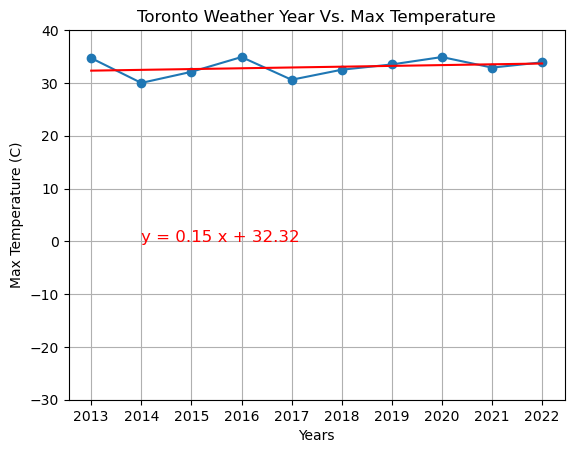

Corroletion value (r value): 0.2627319134810071


In [15]:
# Extract relevant fields from the data frame
x_values = last_decade["YearNum"]
x_values = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

y_values = last_decade["Temp"]

plt.plot(x_values, y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier
# plt.xlim(0, 10)   # fixed ylimits to compare multiple graphs, months easier

plt.title("Toronto Weather Year Vs. Max Temperature")

plt.ylabel("Max Temperature (C)")
plt.xlabel("Years")
plt.grid(True)

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = last_decade["YearNum"]
y_values = last_decade["Temp"]

(slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
regress_values=x_values* slope + intercept

# line plot
plt.plot(x_values, regress_values, color='red')

# Linear equation on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (1,0), fontsize=12, rotation=0, color="red") 

# Show plot
plt.show()

print(f"Corroletion value (r value): {rvalue}")

###  r value 0.295 shows that corrolation is not strong

###  another approach ????

###  ----------------------------???      after this point is just trial        ???--------------------------------

In [16]:
# just thinking if concatenate all july s , would that be better r value to trust more?????
# concatenate july months, from 2013 to 2022

combined_df=july13
combined_df=pd.concat([combined_df, july14], ignore_index = True)
combined_df=pd.concat([combined_df, july15], ignore_index = True)
combined_df=pd.concat([combined_df, july16], ignore_index = True)
combined_df=pd.concat([combined_df, july17], ignore_index = True)
combined_df=pd.concat([combined_df, july18], ignore_index = True)
combined_df=pd.concat([combined_df, july19], ignore_index = True)
combined_df=pd.concat([combined_df, july20], ignore_index = True)
combined_df=pd.concat([combined_df, july21], ignore_index = True)
combined_df=pd.concat([combined_df, july22], ignore_index = True)

display(combined_df)



,Year,Month,Day,Temp
0,2013.0,7.0,1.0,24.1
1,2013.0,7.0,2.0,21.6
2,2013.0,7.0,3.0,26.3
3,2013.0,7.0,4.0,26.6
4,2013.0,7.0,5.0,24.1
...,...,...,...,...
305,2022.0,7.0,27.0,25.6
306,2022.0,7.0,28.0,28.1
307,2022.0,7.0,29.0,28.3
308,2022.0,7.0,30.0,25.3


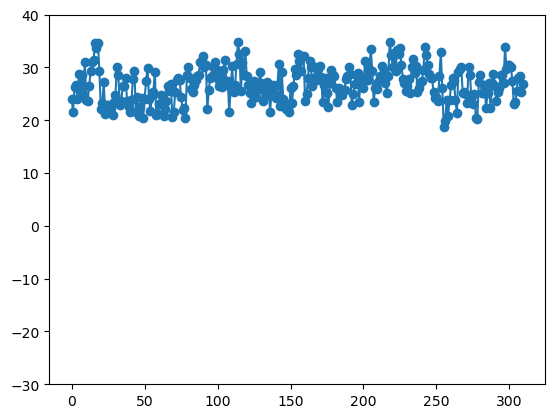

r value: 0.2627319134810071


In [25]:

# Extract relevant fields from the data frame
x_values = combined_df["Year"]
y_values = combined_df["Temp"]

plt.plot(y_values, marker='o') 

# other graph properties
plt.ylim(-30, 40) # fixed ylimits to compare multiple graphs, months easier


# Show plot
plt.show()

print(f"r value: {rvalue}")

###  ----------------------------???      end of trial        ???--------------------------------

###  Fire Incidents Per Year  (in the same period of time)

In [18]:
# original data have per hour granulation
fire_df = pd.read_csv("FireInput/FireIncidents.csv")

fire_df

,_id,Area_of_Origin,Building_Status,Business_Impact,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Dollar_Loss,Estimated_Number_Of_Persons_Displaced,Exposures,Ext_agent_app_or_defer_time,...,Smoke_Alarm_at_Fire_Origin_Alarm_Type,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Sprinkler_System_Presence,Status_of_Fire_On_Arrival,TFS_Alarm_Time,TFS_Arrival_Time,TFS_Firefighter_Casualties,Year
0,1416826,74 - Storage Area (outside),NaN,NaN,0.0,0.0,1000.0,NaN,NaN,2011-01-01T00:15:59,...,NaN,NaN,NaN,NaN,NaN,5 - Flames showing from large area (more than ...,2011-01-01T00:06:48,2011-01-01T00:12:54,0.0,2011
1,1417004,"75 - Trash, rubbish area (outside)",NaN,NaN,0.0,0.0,50.0,NaN,NaN,2011-01-01T02:58:00,...,NaN,NaN,NaN,NaN,NaN,9 - Unclassified,2011-01-01T02:48:16,2011-01-01T02:55:55,0.0,2011
2,1424799,"21 - Living Area (e.g. living, TV, recreation,...",01 - Normal (no change),8 - Not applicable (not a business),0.0,0.0,60000.0,12.0,NaN,2011-01-01T06:03:00,...,8 - Not applicable - no smoke alarm or presenc...,9 - Undetermined,"4 - Spread beyond room of origin, same floor",8 - Not applicable - no sprinkler system present,3 - No sprinkler system,2 - Fire with no evidence from street,2011-01-01T05:49:17,2011-01-01T05:56:57,0.0,2011
3,1424781,24 - Cooking Area or Kitchen,01 - Normal (no change),8 - Not applicable (not a business),0.0,0.0,5000.0,0.0,NaN,2011-01-01T06:39:31,...,2 - Hardwired (standalone),1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor",9 - Activation/operation undetermined,9 - Undetermined,1 - Fire extinguished prior to arrival,2011-01-01T06:26:15,2011-01-01T06:33:37,0.0,2011
4,1416836,83 - Electrical Systems,08 - Not Applicable,8 - Not applicable (not a business),0.0,0.0,2000.0,0.0,NaN,2011-01-01T11:44:59,...,8 - Not applicable - no smoke alarm or presenc...,"8 - Not applicable: No alarm, no persons present",2 - Confined to part of room/area of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,9 - Unclassified,2011-01-01T11:20:22,2011-01-01T11:26:37,0.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25855,1412530,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31T16:36:48,2021-12-31T16:41:47,0.0,2021
25856,1412531,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31T19:14:27,2021-12-31T19:18:46,0.0,2021
25857,1412532,"25 - Washroom or Bathroom (toilet,restroom/loc...",01 - Normal (no change),1 - No business interruption,0.0,0.0,1000.0,2.0,NaN,2021-12-31T19:40:28,...,9 - Type undetermined,7 - Not applicable: Occupant(s) first alerted ...,3 - Spread to entire room of origin,8 - Not applicable - no sprinkler system present,3 - No sprinkler system,1 - Fire extinguished prior to arrival,2021-12-31T19:30:28,2021-12-31T19:36:06,0.0,2021
25858,1412526,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31T22:41:57,2021-12-31T22:48:52,0.0,2021


In [19]:
# select day max temperature and create 1 row per day
year      = fire_df['Year'].groupby(fire_df['Year']).mean()
fireCount = fire_df['Year'].groupby(fire_df['Year']).count()

fire_df_selected = pd.DataFrame({ "Year":       year, 
                                  "Fire Count": fireCount
                                })

fire_df_selected

,Year,Fire Count
Year,,
2011,2011.0,1811
2012,2012.0,1834
2013,2013.0,1796
2014,2014.0,1843
2015,2015.0,1816
2016,2016.0,1834
2017,2017.0,1753
2018,2018.0,3330
2019,2019.0,2948


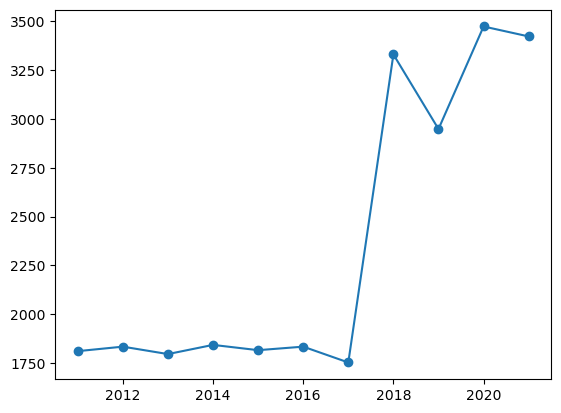

In [20]:
# Extract relevant fields from the data frame
x_values = fire_df_selected["Fire Count"]
#x_values = ['2011','2012','2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

y_values = fire_df_selected["Fire Count"]

plt.plot( y_values, marker='o') 

In [21]:
# I was trying to corrolate "toronto weather max temperature" and "fire incidents" increases, 
# but
# rValue is too small in weather increase, and the slope of linear equation is 0.16
# fire number increase too big or there is a significant jump, there must be some other contributors we did not consider
# so available information/analiysis is not enough to make any conclusions
# we need more time and more data to create some relation between weather temp increase and fire number increase.